In [38]:
from frc3223_azurite.conversions import *
from matplotlib import pyplot as plt
import numpy
import pathfinder as pf
import math
import csv


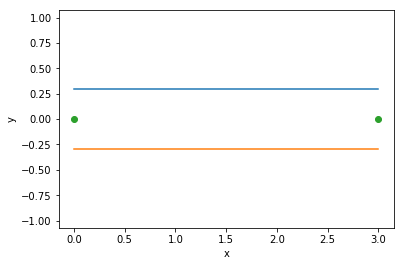

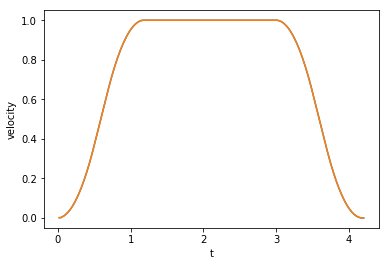

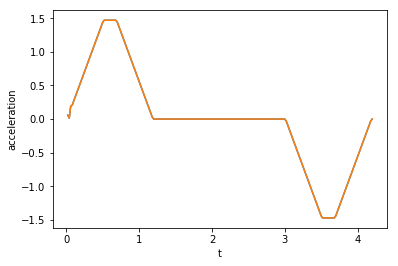

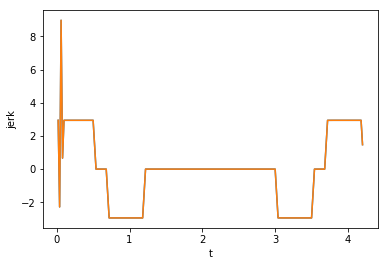

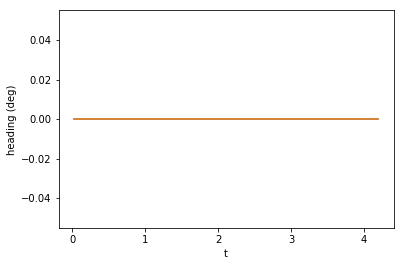

In [45]:
points = [
    pf.Waypoint(0, 0, 0), 
    #pf.Waypoint(1, 0.3, math.radians(45)), 
    #pf.Waypoint(2, 1.8, math.radians(45)), 
    pf.Waypoint(3, 0, 0)
]

def write_trajectory(fnom, left, right):
    with open(fnom, 'w') as f:
        writer = csv.writer(f)
        writer.writerow(["dt", "xl", "xr", "vl", "vr", "al", "ar", "heading"])
        for (xl, xr) in zip(left, right):
            writer.writerow([xl.dt, xl.position, xr.position, xl.velocity, xr.velocity, xl.acceleration, xr.acceleration, xl.heading])
    

info, trajectory = pf.generate(points, pf.FIT_HERMITE_CUBIC, pf.SAMPLES_HIGH,
                                   dt=0.02, # 20ms
                                   max_velocity=1.0,
                                   max_acceleration=2.0,
                                   max_jerk=3.0)
# Wheelbase Width = 0.5m
modifier = pf.modifiers.TankModifier(trajectory).modify(inch_to_meter(23.5))
left = modifier.getLeftTrajectory()
right = modifier.getRightTrajectory()

ts = numpy.cumsum(numpy.array([x.dt for x in left]))
xsl = numpy.array([s.x for s in left])
ysl = numpy.array([s.y for s in left])
vsl = numpy.array([s.velocity for s in left])
asl = numpy.array([s.acceleration for s in left])
jsl = numpy.array([s.jerk for s in left])
xsr = numpy.array([x.x for x in right])
ysr = numpy.array([x.y for x in right])
vsr = numpy.array([s.velocity for s in right])
asr = numpy.array([s.acceleration for s in right])
jsr = numpy.array([s.jerk for s in right])
heading = numpy.array([s.heading for s in left])
heading2 = numpy.array([s.heading for s in right])

plt.plot(xsl, ysl)
plt.plot(xsr, ysr)
plt.xlabel('x')
plt.ylabel('y')
plt.plot([p.x for p in points], [p.y for p in points], 'o')
plt.axis('equal')
plt.show()
plt.plot(ts, vsl)
plt.plot(ts, vsr)
plt.xlabel('t')
plt.ylabel('velocity')
plt.show()
plt.plot(ts, asl)
plt.plot(ts, asr)
plt.xlabel('t')
plt.ylabel('acceleration')
plt.show()
plt.plot(ts, jsl)
plt.plot(ts, jsr)
plt.xlabel('t')
plt.ylabel('jerk')
plt.show()
plt.plot(ts, numpy.degrees(heading))
plt.plot(ts, numpy.degrees(heading2))
plt.xlabel('t')
plt.ylabel('heading (deg)')
plt.show()

In [41]:
write_trajectory('straight3m.csv', left, right)